## Importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob


## Entendendo os dados

### Arquivos de treino
Contem dados de interações dos usuários com as notícias antes de uma data limite T. Incluem informações sobre quais notícias foram acessadas, quando, por quanto tempo, quantos cliques o usuário deu, etc.

In [2]:
treino_parte1 = pd.read_csv('/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/files/treino/treino_parte1.csv')
treino_parte1.head(2)

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...","6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."


O que significa cada coluna?

- `userId`: ID único do usuário.
- `userType`: Se o usuário está logado ou é anônimo.
- `HistorySize`: Quantidade total de notícias lidas pelo usuário.
- `history`: Lista das notícias visitadas pelo usuário (IDs das páginas).
- `TimestampHistory`: Momento em que cada notícia foi lida.
- `timeOnPageHistory`: Tempo (em milissegundos) que o usuário ficou na página.
- `numberOfClicksHistory`: Quantidade de cliques feitos na notícia.
- `scrollPercentageHistory`: Percentual da página visualizada pelo usuário.
- `pageVisitsCountHistory`: Quantidade de vezes que o usuário visitou a mesma notícia.

In [2]:
itens = pd.read_csv('/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/itens/itens/itens-parte1.csv')
itens.head()

<IPython.core.display.Javascript object>

,page,url,issued,modified,title,body,caption
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic..."


`Itens` contêm informações sobre as notícias que aparecem no histórico dos usuários. 

O que significa cada coluna?

- `Page`: ID da notícia, que aparece na coluna history do conjunto de treino.
- `Url`: Link da matéria no Globoplay.
- `Issued`: Data de publicação da notícia.
- `Modified`: Última data em que a matéria foi modificada.
- `Title`: Título da matéria.
- `Body`: Texto completo da notícia.
- `Caption`: Subtítulo da notícia.


#### Como os dados se relacionam?

Os dois conjuntos de dados estão ligados pelo ID da notícia (Page), que aparece tanto no treino (history) quanto nos itens (Page).


In [25]:
validacao = pd.read_csv('/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/validacao.csv')
validacao.head()

,userId,userType,history,timestampHistory
0,e25fbee3a42d45a2914f9b061df3386b2ded2d8cc1f3d4...,Logged,['be89a7da-d9fa-49d4-9fdc-388c27a15bc8'\n '01c...,[1660533136590 1660672113513]
1,d0afad7ea843d86597d822f0df1d39d31a3fea7c39fdee...,Logged,['77901133-aee7-4f7b-afc0-652231d76fe9'],[1660556860253]
2,755062dd39a48809880cf363b04268c3af2c003088cde0...,Logged,['857aa90f-a7ec-410d-ba82-dfa4f85d4e71'],[1660561649242]
3,ec1639851d99586c7f4da928deb49187303aec6e3b8d66...,Logged,['b7b90e18-7613-4ca0-a8fc-fd69addfcd85'\n '835...,[1660533830245 1660540831707 1660542659111 166...
4,a120515626fe5d12b22b7d5a7c5008912cc69284aa26cc...,Logged,['9c764c3a-f9f8-4fb2-b2c4-6331eaeb3dd6'\n 'b8e...,[1660548813953 1660572329731 1660594848200]


O conjunto de validação contém um período de tempo posterior ao conjunto de treino. Ou seja, ele contém os usuários que já estão no treino, mas mostra um novo conjunto de interações que ocorreram após T.

Colunas do conjunto de validação:

- `userId`: Identificação do usuário.
- `userType`: Usuário logado ou anônimo.
- `history`: Lista de notícias que o usuário visitou após T.

Ou seja, temos quais notícias o usuário acessou depois de T.

## Análise exploratória

In [15]:
treino_path = "/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/files/treino/"
itens_path = "/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/itens/itens"

In [16]:
# Listar arquivos disponíveis
treino_files = sorted(glob(os.path.join(treino_path, "treino_parte*.csv")))
itens_files = sorted(glob(os.path.join(itens_path, "itens-parte*.csv")))

In [20]:
# Carregar e concatenar os arquivos de treino
df_treino = pd.concat([pd.read_csv(f) for f in treino_files], ignore_index=True)
df_treino.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe856057...","1656684240278, 1656761266729, 1656761528085, 1...","7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 14, 45, 13, ...","6049, 210489, 8672, 10000, 30000, 123007, 9965...","25.35, 45.66, 35.3, 28.05, 36.53, 47.57, 55.33...","1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1...","1656684240278, 1656761266729, 1656761528085, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"04756569-593e-4133-a95a-83d35d43dbbd, 29b6b142...","1656678946256, 1656701076495, 1656701882565, 1...","0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, 0, 0, 44, 0,...","311274, 140000, 32515, 157018, 118689, 159243,...","67.58, 47.22, 41.52, 63.09, 51.38, 65.11, 71.9...","1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1...","1656678946256, 1656701076495, 1656701882565, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"1f2b9c2f-a2d2-4192-b009-09065da8ec23, 04756569...","1658333312180, 1658404553818, 1658408449062, 1...","8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1...","182696, 91925, 30000, 273655, 126409, 42980, 1...","58.26, 72.66, 22.57, 59.89, 40.36, 36.35, 14.7...","1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","1658333312180, 1658404553818, 1658408449062, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484a7...","1658766608801, 1658766608801, 1660084035094, 1...","579, 579, 7, 2","801396, 801396, 10000, 10000","78.74, 78.74, 16.71, 9.34","7, 7, 1, 1","1658766608801, 1658766608801, 1660084035094, 1..."


In [22]:
# Carregar e concatenar os arquivos de itens (notícias)
df_itens = pd.concat([pd.read_csv(f) for f in itens_files], ignore_index=True)
df_itens.head()

,page,url,issued,modified,title,body,caption
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic..."


### Visão geral dos dados

In [26]:
print("\nInformações do conjunto de treino:")
print(df_treino.info())


Informações do conjunto de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577942 entries, 0 to 577941
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   userId                   577942 non-null  object
 1   userType                 577942 non-null  object
 2   historySize              577942 non-null  int64 
 3   history                  577942 non-null  object
 4   timestampHistory         577942 non-null  object
 5   numberOfClicksHistory    577942 non-null  object
 6   timeOnPageHistory        577942 non-null  object
 7   scrollPercentageHistory  577942 non-null  object
 8   pageVisitsCountHistory   577942 non-null  object
 9   timestampHistory_new     577942 non-null  object
dtypes: int64(1), object(9)
memory usage: 44.1+ MB
None


In [27]:
# Verificar valores nulos
print("\nValores nulos no treino:")
print(df_treino.isnull().sum())


Valores nulos no treino:
userId                     0
userType                   0
historySize                0
history                    0
timestampHistory           0
numberOfClicksHistory      0
timeOnPageHistory          0
scrollPercentageHistory    0
pageVisitsCountHistory     0
timestampHistory_new       0
dtype: int64


In [28]:
print("\nInformações do conjunto de itens:")
print(df_itens.info())


Informações do conjunto de itens:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      255603 non-null  object
 1   url       255603 non-null  object
 2   issued    255603 non-null  object
 3   modified  255603 non-null  object
 4   title     255603 non-null  object
 5   body      255603 non-null  object
 6   caption   255603 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB
None


In [29]:
print("\nValores nulos nos itens:")
print(df_itens.isnull().sum())


Valores nulos nos itens:
page        0
url         0
issued      0
modified    0
title       0
body        0
caption     0
dtype: int64


In [30]:
print("\nInformações do conjunto de validação:")
print(validacao.info())


Informações do conjunto de validação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112184 entries, 0 to 112183
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userId            112184 non-null  object
 1   userType          112184 non-null  object
 2   history           112184 non-null  object
 3   timestampHistory  112184 non-null  object
dtypes: object(4)
memory usage: 3.4+ MB
None


In [31]:
print("\nValores nulos na validação:")
print(validacao.isnull().sum())


Valores nulos na validação:
userId              0
userType            0
history             0
timestampHistory    0
dtype: int64


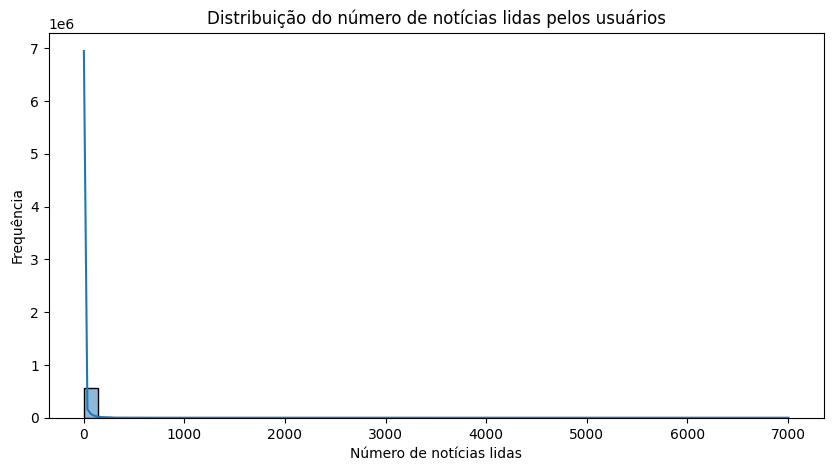

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df_treino["historySize"], bins=50, kde=True)
plt.title("Distribuição do número de notícias lidas pelos usuários")
plt.xlabel("Número de notícias lidas")
plt.ylabel("Frequência")
plt.show()

In [34]:
df_treino["historySize"].describe()

count    577942.000000
mean         14.056689
std          46.037793
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max        7004.000000
Name: historySize, dtype: float64

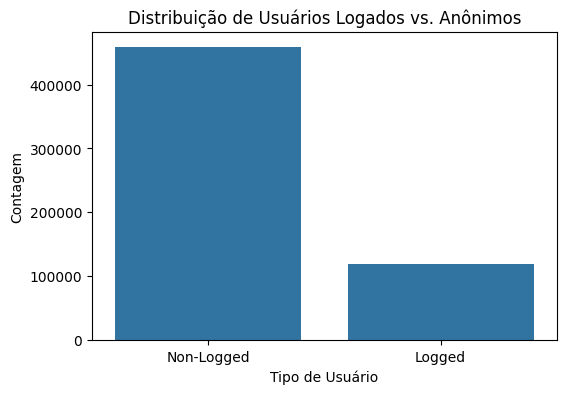

In [35]:
# --- 3. USUÁRIOS LOGADOS VS. ANÔNIMOS ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df_treino, x="userType")
plt.title("Distribuição de Usuários Logados vs. Anônimos")
plt.xlabel("Tipo de Usuário")
plt.ylabel("Contagem")
plt.show()

### Analisar coluna de timestamp

Tem uma lista de timestamps, isso representa as datas que um uma pessoa visitou a mesma noticia?

# Juntando tabelas

In [7]:

# Listar e carregar os arquivos de treino
treino_files = glob.glob('/Users/leticiapires/Desktop/G1Recommender/dados/challenge-webmedia-e-globo-2023/files/treino/treino_parte*.csv')
df_treino = pd.concat([pd.read_csv(f) for f in treino_files], ignore_index=True)

In [8]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577942 entries, 0 to 577941
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   userId                   577942 non-null  object
 1   userType                 577942 non-null  object
 2   historySize              577942 non-null  int64 
 3   history                  577942 non-null  object
 4   timestampHistory         577942 non-null  object
 5   numberOfClicksHistory    577942 non-null  object
 6   timeOnPageHistory        577942 non-null  object
 7   scrollPercentageHistory  577942 non-null  object
 8   pageVisitsCountHistory   577942 non-null  object
 9   timestampHistory_new     577942 non-null  object
dtypes: int64(1), object(9)
memory usage: 44.1+ MB


In [9]:
df_treino.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1","1657908085200, 1659634203762"
1,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,"19ba89fc-1e06-4c5d-9c57-4a3088dc0511, e273dba4...","1657111508570, 1657481309920","68, 12","131495, 43733","51.74, 35.49","1, 1","1657111508570, 1657481309920"
2,528a8d7a2af73101da8d6709c1ec875b449a5a58749a99...,Non-Logged,2,"59a61a8a-cc52-453f-b1cd-2bd019e9d574, a0562805...","1657823890328, 1660141444328","55, 9","159042, 10336","62.19, 48.28","1, 1","1657823890328, 1660141444328"
3,2dd18b58a634a4e77181a202cf152df6169dfb3e4230ef...,Non-Logged,2,"233f8238-2ce0-470f-a9d5-0e0ac530382a, 037155f4...","1656963373076, 1657091888917","0, 0","193579, 20519","31.03, 31.9","1, 1","1656963373076, 1657091888917"
4,97e1439d485b0630e12818d3df84ff67d08475ef6ebeb0...,Logged,2,"385044ad-3876-4188-83fa-f560435c1a9c, 2f754502...","1657618607633, 1659536839832","57, 38","220000, 130000","52.65, 53.37","1, 1","1657618607633, 1659536839832"


In [ ]:
# Explodir colunas que contêm listas
df_treino['history'] = df_treino['history'].apply(eval)
df_treino = df_treino.explode('history')
df_treino['numberOfClicksHistory'] = df_treino['numberOfClicksHistory'].apply(eval)
df_treino = df_treino.explode('numberOfClicksHistory')
df_treino['timeOnPageHistory'] = df_treino['timeOnPageHistory'].apply(eval)
df_treino = df_treino.explode('timeOnPageHistory')
df_treino['scrollPercentageHistory'] = df_treino['scrollPercentageHistory'].apply(eval)
df_treino = df_treino.explode('scrollPercentageHistory')
df_treino['pageVisitsCountHistory'] = df_treino['pageVisitsCountHistory'].apply(eval)
df_treino = df_treino.explode('pageVisitsCountHistory')